# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/Users/jwhoj/Desktop/hospital_readmit/data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jwhoj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


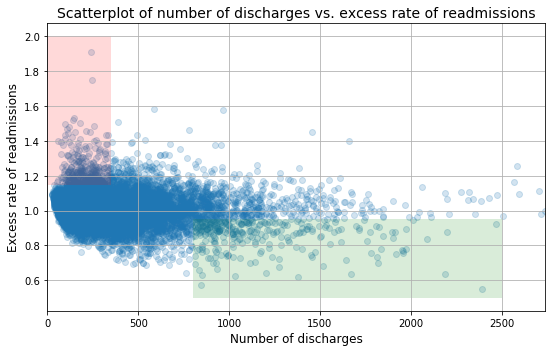

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Initial observations based on the plot above

    Overall, rate of readmissions is trending down with increasing number of discharges
    With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)


In [6]:
# Linear regression on the hospital admission data
a, b = np.polyfit(x, y, 1)
print(a, b)

-2.8565052943822905e-05 1.0179475579544215


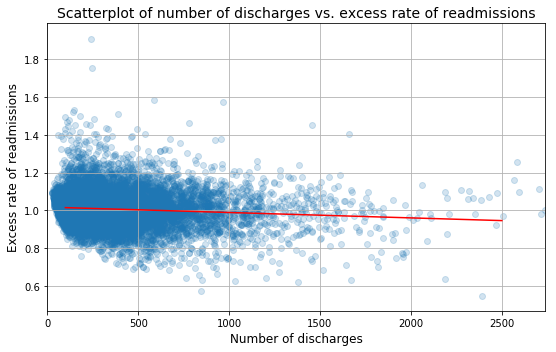

In [7]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([100, 2500])
y_theor = a * x_theor + b

# Plot the above data and a theoretical line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.plot(x_theor, y_theor, 'r')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Show the plot
plt.show()

From our linear regression, our value of 'a' which is the slope -2.8565052943822905e-05. 
We can see the trend line is ever so slightly trending downwards. However, the slope 
is so close to zero it is not convincing enough to say the data is decreasing. 

For the other claims that 'with lower number of discharges, there is a greater incidence of excess rate of readmissions'
and 'higher number of discharges, there is a greater incidence of lower rates of readmissions', we must explore the data
further to illustrate them more clearly. 

# B. Statistics

    In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
    In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [8]:
# In hospitals/facilities with number of discharges < 100, mean excess readmission rate 
np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'])

1.0226183501683506

In [9]:
small_hospital_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & 
                                           (clean_hospital_read_df['Number of Discharges'] > 0) ]

In [10]:
# In hospitals/facilities with number of discharges < 100, the portion that has excess readmission rate greater than 1
len(small_hospital_df[small_hospital_df['Excess Readmission Ratio'] > 1])/len(small_hospital_df)

0.6321548821548821

In [11]:
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate
np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'])

0.9783354211663071

In [12]:
large_hospital_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

In [13]:
# In hospitals/facilities with number of discharges > 1000, the portion that has excess readmission rate greater than 1
len(large_hospital_df[large_hospital_df['Excess Readmission Ratio'] > 1])/len(large_hospital_df)

0.4449244060475162

As we can see from our analysis of the mean excess readmission rate, 
we do indeed see that the B. Statistics observation is correct. 
In smaller hospitals/facilities where number of discharges are < 100, 
the mean excess readmission rate is 1.0226183501683506 and the 
portion that have excess readmission rate greater than 1 is 0.6321548821548821.

In large hospitals/facilities where the number of discharges are > 1000, 
the mean excess readmission rate is 0.9783354211663071 and the 
portion that have excess readmission rate greater than 1 is 0.4449244060475162.

# C. Conclusions

    There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
    Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.


In order to test this correlation, we will conduct a hypothesis test. 
 
The null and alternative hypotheses for observation C are:

H0: There is no significant correlation between hospital capacity (number of discharges) and readmission rates. 
    
Ha: There is significant correlation between hospital capacity (number of discharges) and readmission rates.

In [50]:
# Compute the pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix
    matrix = np.corrcoef(x, y)

    # Return entry [0,1]
    return matrix[0,1]

In [51]:
# Compute observed correlation
discharges = np.array(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]['Number of Discharges'])
readmission = np.array(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>0]['Excess Readmission Ratio'])
r_obs = pearson_r(readmission, discharges)
print('The observed correlation is', r_obs)

The observed correlation is -0.09739794351079353


In [55]:
# Initialize permutation replicates
perm_rep = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute readmission rate
    perm_readmission = np.random.permutation(readmission)

    # Compute Pearson correlation
    perm_rep[i] = pearson_r(perm_readmission, discharges)

# Compute p-value
p = np.sum(perm_rep < r_obs) / len(perm_replicates)

# Print
alpha = 0.01
print('p-value:', '%.2f' %p)
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

p-value: 0.00
Reject null hypothesis


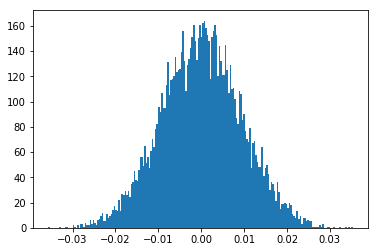

In [60]:
# Plot histogram of the correlation derived from the permutation replicates
plt.hist(perm_rep, bins=200)
plt.show()

This histogram above illustrates:

Our observed correlation of -0.09739794351079353 is beyond the range of the correlation derived from the 
permutation replicates. 

In [56]:
from scipy import stats
mean_correlation = np.mean(perm_rep)
std_correlation = np.std(perm_rep)
interval = stats.norm.interval(0.99, loc=mean_correlation, scale=std_correlation)
print('For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is', interval)

For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is (-0.024052034651333768, 0.02419556577977994)


The correlation between readmission rates and discharge rates may be 
due to chance and are completely independent. 
This is the null hypothesis we explored above. By using the permutation test, we are simulating the hypothesis that 
they are independent of each other. For each permutation, we calculatedthe Pearson correlation coefficient to see 
how many permutation replicates have a Pearson correlation coefficient > than the observed value. 

As the testing above shows, the observed correlation is -0.09739794351079353 is lower than the p-value of 0.00 
The correlation coefficient should also be within the confidence interval and it is beyond that of: 
    (-0.024052034651333768, 0.02419556577977994). We can also see this visually from the above histogram. 
    
This means that we reject the null hypothesis and that there is statistical significance between readmission rates 
and hospital capacity. This coincides with the possibility that smaller hospitals/facilities are lacking quality 
equipment and care to prevent readmissions. 

# D. Regulatory policy recommendations

    Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


As we have computed, smaller hospitals/facilities have a mean excess readmission rate of 1.023. 
While larger hospitals/facilities have a mean excess readmission rate of 0.978. Though there is 
a statistical significance between the two readmission rates, it is almost negligible. 

For practical significance, I would recommend hospitals and facilities to focus on other variables that may contribute 
to the quality of care for patients to influence the readmission rate. For example, making sure patients being discharged
understand fully and thoroughly after care instructions for their well-being at home. This will potentially help 
lessen the readmission rate if patients are educated about their care. 

# Scatterplot 
Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?

The scatter plot above shows "Scatterplot of number of discharges vs. excess rate of readmissions". 
It is useful to use a scatterplot to convey the relationship between two variables. However you 
need to know how to use them and interpret them properly. A disadvantage of using a scatter plot 
is it can make it hard to see data or trends clearly. Another disadvantage of this scatter plot is that when 
there is a large number of data points, you cannot see clearly the individual data points. It becomes 
an all blue, concentrated area. 

Because there are so many data points in the above scatter plot, readers are unable to see any distinct 
trends. It is unclear what the relationship between number of discharges and excess rate of readmissions is. 
It is also unclear the relationship between large and small hospitals/facilities. An alternative would be 
to graph with a smoothing function to illustrate more clearly the trends of the data points. 
https://plot.ly/python/smoothing/ 
    
Smoothing is a technique used to eliminate or reduce noise from a dataset. The general purpose is to decrease
the rough edges or 'smooth' the data. 

In [25]:
# Plotly 
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [26]:
def smoothTriangle(data, degree, dropVals=False):
    triangle=np.array(list(range(degree)) + [degree] + list(range(degree)[::-1])) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    if dropVals:
        return smoothed
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [49]:
# Create a scatterplot for number of discharges vs. excess rate of readmissions

# Create list of Number of Discharges and Excess Readmission Ratio
groupby = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].groupby(['Number of Discharges']).mean()
groupby.reset_index(inplace=True)
x = list(grouped['Number of Discharges'])
y = list(grouped['Excess Readmission Ratio'])

data = go.Scatter(x=x,
                  y=smoothTriangle(y, 30),
                  mode='markers',
                  marker=dict(size=6, color='#C190F0', symbol='circle-open'))

layout = go.Layout(title='Number of Discharges vs. Excess Readmission Ratio (smoothed)',
                   xaxis=dict(title='Number of Discharges'),
                   yaxis=dict(title='Excess Readmission Ratio'),
                   showlegend=False)

fig = go.Figure(data=[data], layout=layout)
py.offline.iplot(fig)

As we can see from the smoothing function graph above, the trends are much clearer than the previous scatter plot. 
We are able to see that the readmission ratio does indeed decrease as number of discharges increase. This suggests
that larger hospitals have a lower readmission rate, while smaller hospitals have a higher readmission rate. 

I retract my previous statement that "smaller hospitals/facilities have a mean excess readmission rate of 1.023. While larger 
hospitals/facilities have a mean excess readmission rate of 0.978. Though there is a statistical significance between 
the two readmission rates, it is almost negligible. "

With clearer insight into the data, we could recommend smaller hospitals to explore different possibilities for their 
higher readmission ratio. Quality of care, equipment, employees, sanitation, and aftercare are all possibilites. Directives
and incentives should be consolidated for smaller hospitals/facilities to improve their standards of readmission. 